In [1]:

########## GEMINI行情接口 ##########
## https://api.gemini.com/v1/pubticker/:symbol

import json
import requests

gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
symbol = 'btcusd'
btc_data = requests.get(gemini_ticker.format(symbol)).json()
print(json.dumps(btc_data, indent=4))

########## 输出 ##########

# {
#    "bid": "8825.88",
#    "ask": "8827.52",
#    "volume": {
#        "BTC": "910.0838782726",
#        "USD": "7972904.560901317851",
#        "timestamp": 1560643800000
#    },
#    "last": "8838.45"
# }

{
    "bid": "7195.85",
    "ask": "7199.84",
    "volume": {
        "BTC": "729.9169126614",
        "USD": "5319112.641904280639",
        "timestamp": 1577404200000
    },
    "last": "7195.83"
}


抓取、格式化和绘制，比特币过去一个小时在 Gemini 交易所的价格曲线

    CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice     Volume  \
0  1575594000    7393.68    7393.68   7364.61     7372.94   1.581599   
1  1575604800    7373.68    7379.00   7355.31     7377.49   3.024318   
2  1575608400    7372.16    7412.62   7352.30     7398.49  20.521418   
3  1575612000    7406.00    7413.54   7381.29     7399.56  10.655643   
4  1575615600    7395.22    7395.29   7338.60     7363.96  34.960820   

              NA  
0   11690.131671  
1   22286.360414  
2  151836.999296  
3   78835.328726  
4  257625.548339  


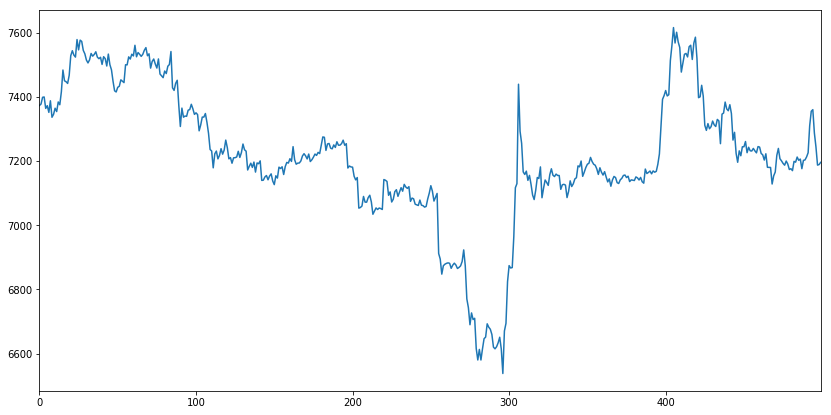

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# 选择要获取的数据时间段
periods = '3600'

# 通过Http抓取btc历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc', 
  params={
    'periods': periods
  })
data = resp.json()

# 转换成pandas data frame
df = pd.DataFrame(
  data['result'][periods], 
  columns=[
    'CloseTime',
    'OpenPrice',
    'HighPrice',
    'LowPrice',
    'ClosePrice',
    'Volume',
    'NA'])

# 输出DataFrame的头部几行
print(df.head())

# 绘制btc价格曲线
df['ClosePrice'].plot(figsize=(14, 7))